<a href="https://colab.research.google.com/github/aiforkorea/iris/blob/main/iris4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [89]:
# 0. 판다스 라이브러리 임포트
import  pandas  as  pd
# 1. github 데이터 읽기
df = pd.read_csv("https://raw.githubusercontent.com/talktokorea/storage/master/iris.csv")
# 2. 데이터 모양/속성 확인      (150,5)
print(df.shape)    

(150, 5)


In [90]:
# 데이터 기본 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   category      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [91]:
#시리즈 추출 + 유형/건수 확인
df['category'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: category, dtype: int64

In [92]:
# feature numpy를 df로 변환
df

,sepal-length,sepal-width,petal-length,petal-width,category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [93]:
# 숫자형(int, float) 데이터 분포 조회
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1bf191f510>,
      dtype=object)

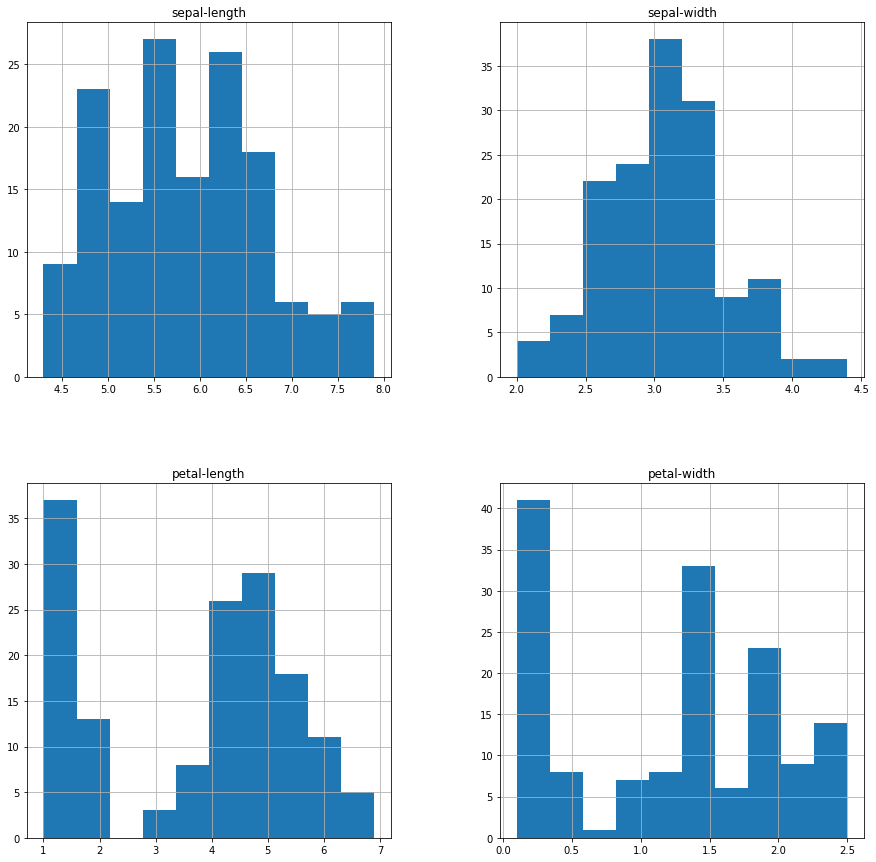

In [94]:
# histogram
df.hist(figsize = (15,15))

In [95]:
# null 합계   df.isna().sum
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
category        0
dtype: int64

In [96]:
# 결손 데이터 대체
# 평균값
# df['sepal_length'] = df['sepal_length'].fillna(df['sepal_length'].mean())
# 특정값 T입력
# df['category'] = df['category'].fillna('T')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

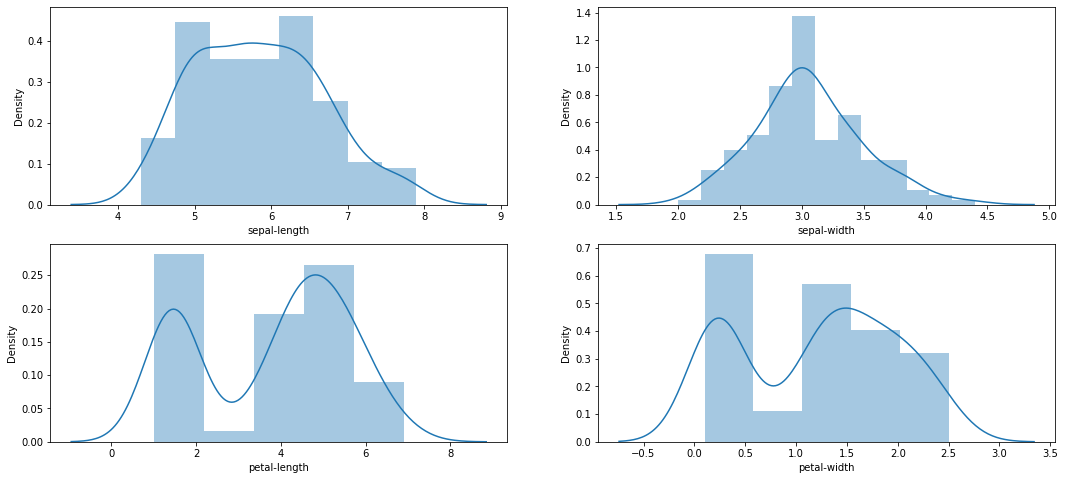

In [97]:
# distribution plots

import seaborn as sns
import matplotlib.pyplot as plt
figure, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.distplot(df['sepal-length'], ax=ax1)
sns.distplot(df['sepal-width'], ax=ax2)
sns.distplot(df['petal-length'], ax=ax3)
sns.distplot(df['petal-width'], ax=ax4)

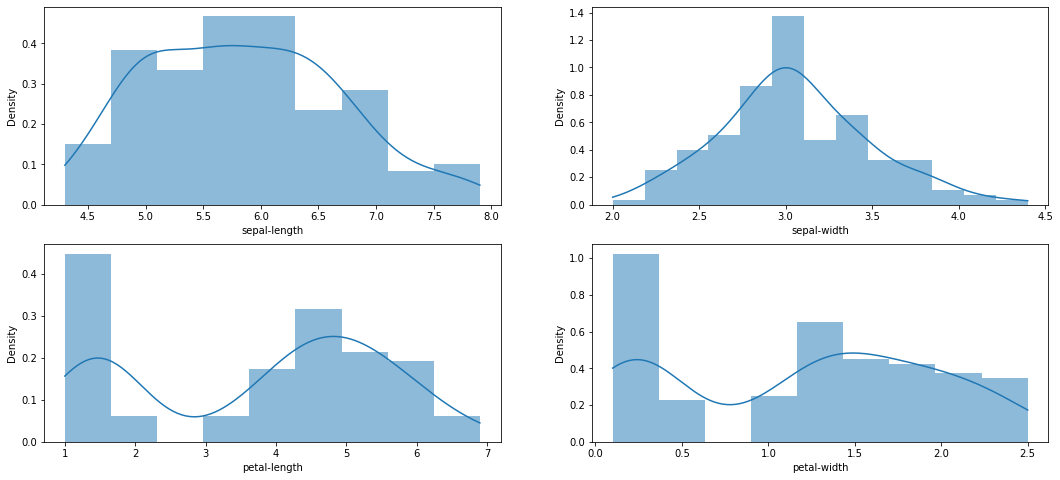

In [98]:
# distribution plots
import seaborn as sns
import matplotlib.pyplot as plt
figure, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)

sns.histplot(df['sepal-length'], ax=ax1, kde=True, stat="density", linewidth=0)
sns.histplot(df['sepal-width'], ax=ax2, kde=True, stat="density", linewidth=0)
sns.histplot(df['petal-length'], ax=ax3, kde=True, stat="density", linewidth=0)
sns.histplot(df['petal-width'], ax=ax4, kde=True, stat="density", linewidth=0)

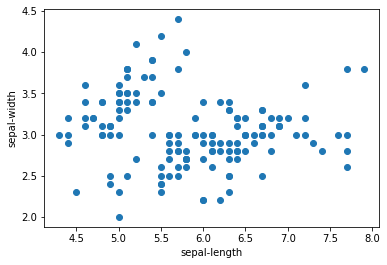

In [99]:
# 6. 산포도 생성
# pd를 numpy로 만들기
data_plt=df.to_numpy()
# sepal-length	sepal-width	petal-length	petal-width
plt.scatter(data_plt[:,0],data_plt[:,1])
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.show() # Display the 2nd plot

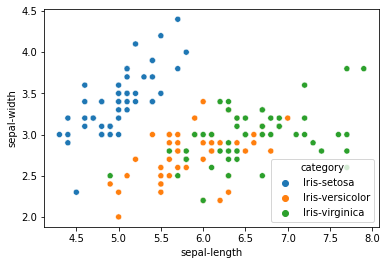

In [100]:
sns.scatterplot(x="sepal-length", y="sepal-width", hue="category", data=df)

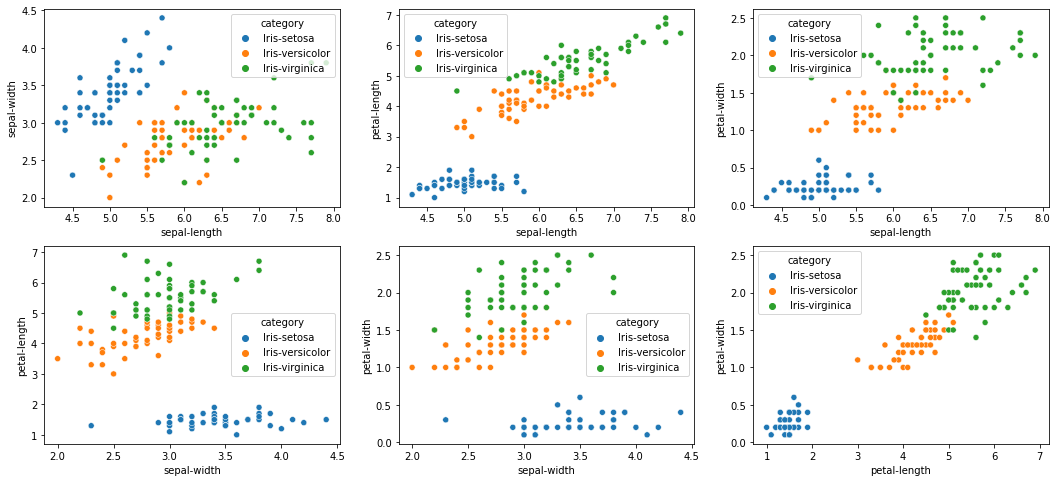

In [101]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
# sepal-length	sepal-width	petal-length	petal-width
sns.scatterplot(ax=ax1, x="sepal-length", y="sepal-width", hue="category", data=df)
sns.scatterplot(ax=ax2, x="sepal-length", y="petal-length", hue="category", data=df)
sns.scatterplot(ax=ax3, x="sepal-length", y="petal-width", hue="category", data=df)

sns.scatterplot(ax=ax4, x="sepal-width", y="petal-length", hue="category", data=df)
sns.scatterplot(ax=ax5, x="sepal-width", y="petal-width", hue="category", data=df)

sns.scatterplot(ax=ax6, x="petal-length", y="petal-width", hue="category", data=df)

In [102]:
# one hot encoding
dfx = pd.get_dummies(df)

In [103]:
dfx

,sepal-length,sepal-width,petal-length,petal-width,category_Iris-setosa,category_Iris-versicolor,category_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [104]:
# 데이터 기본 정보 조회
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sepal-length              150 non-null    float64
 1   sepal-width               150 non-null    float64
 2   petal-length              150 non-null    float64
 3   petal-width               150 non-null    float64
 4   category_Iris-setosa      150 non-null    uint8  
 5   category_Iris-versicolor  150 non-null    uint8  
 6   category_Iris-virginica   150 non-null    uint8  
dtypes: float64(4), uint8(3)
memory usage: 5.3 KB


In [105]:
# 숫자형(int, float) 데이터 분포 조회
dfx.describe()

,sepal-length,sepal-width,petal-length,petal-width,category_Iris-setosa,category_Iris-versicolor,category_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [106]:
# 5. 독립/종속변수 분리            (150,4)  (150,3)
xdata = dfx[["sepal-length","sepal-width","petal-length","petal-width"]]
ydata = dfx[['category_Iris-setosa', 'category_Iris-versicolor','category_Iris-virginica']]
print(xdata.shape,ydata.shape)

(150, 4) (150, 3)


In [107]:
# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(xdata,ydata,test_size=0.2, random_state=11)

In [108]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

In [109]:
# 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [110]:
# 예측
pred = dt_clf.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9333333333333333


In [112]:
# 교재 학습 방법 변경
# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(xdata,ydata,test_size=0.3, random_state=121)
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier()
# 학습
dt_clf.fit(X_train,y_train)
# 예측
pred = dt_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9555555555555556


In [113]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
cv_accuracy=[]
#시리즈 추출 + 유형/건수 확인
df['category'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: category, dtype: int64

In [114]:
import numpy as np
# xdata = df
# needs numpy
xdata_np = xdata.to_numpy()
ydata_np = ydata.to_numpy()

n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(xdata_np):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = xdata_np[train_index], xdata_np[test_index]
    y_train, y_test = ydata_np[train_index], ydata_np[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [115]:
df['category']
print(pd.unique(df['category']))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [116]:
# 레이블 인코딩
ydata_np = df['category'].to_numpy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ydata_kfold = label_encoder.fit_transform(ydata_np)
ydata_kfold

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [117]:
from sklearn.model_selection import StratifiedKFold

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요
# 원핫인코딩된 ydata를 직접 사용하면 Supported target types are: ('binary', 'multiclass'). Got 'multilabel-indicator' instead. 에러 발생
# 원핫보다는 레이블 인코딩 사용할 것
# cross_val_score()도 동일함  
for train_index, test_index  in skfold.split(xdata_np,ydata_kfold):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = xdata_np[train_index], xdata_np[test_index]
    y_train, y_test = ydata_kfold[train_index], ydata_kfold[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train, y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


In [118]:
from sklearn.utils.multiclass import type_of_target
type_of_target(ydata)

'multilabel-indicator'

In [119]:
# cross_val_score() 단일 성능지표
#  cf.  cross_validate  다수 성능지표
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate

dt_clf = DecisionTreeClassifier(random_state=156)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(dt_clf, xdata_np, ydata_kfold, scoring='accuracy', cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


In [120]:
# GridSearchCV 교차검증 + 하이퍼 패러미터 튜닝
# 결정 트리 알고리즘


In [121]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# parameter를 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [122]:
import pandas as pd
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재학습시킴  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)
# GridSearchCV 결과인 grid_dtree.cv_results_를 DataFrame으로 변환 및 인쇄
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [123]:
# GridSearchCV 결과중 최고 결과인 grid_dtree.best_params_와 grid_dtree.best_score_를 인쇄
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [124]:
# refit=True (기본값)이므로 GridSearchCV가 Estimator를 최적으로 학습해 best_estimator_로 저장함
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_
# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
# X_test를 이용하여 예측
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


In [125]:
y_train

array([1, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1,
       2, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [126]:
X_train

array([[6.7, 3.1, 4.7, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.6, 0.6],
       [6.4, 2.9, 4.3, 1.3],
       [7.2, 3.6, 6.1, 2.5],
       [5.3, 3.7, 1.5, 0.2],
       [5.7, 3.8, 1.7, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [6.3, 2.7, 4.9, 1.8],
       [6. , 3. , 4.8, 1.8],
       [6.4, 3.1, 5.5, 1.8],
       [5.1, 3.8, 1.5, 0.3],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.8, 5.1, 1.5],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3.4, 1.9, 0.2],
       [6.3, 2.5, 4.9, 1.5],
       [5. , 3.5, 1.3, 0.3],
       [5.2, 3.5, 1.5, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.1, 3. , 4.6, 1.4],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.4, 1.6, 0.4],
       [6.5, 3. , 5.2, 2. ],
       [6.7, 3.3, 5.7, 2.5],
       [5. , 2.3, 3.3, 1. ],
       [5.4, 3.4, 1.5, 0.4],
       [4.4, 3.2, 1.3, 0.2],
       [6.2, 2.9, 4.3, 1.3],
       [5.1, 3.5, 1.4, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3

In [128]:
# 10. applying standard scale method when data is Gaussian
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 10.1 scaling training and testing data set
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
print(X_train_ss[0:5,:])
print(X_test_ss[0:5,:])

[[ 1.01776338  0.08552093  0.52482329  0.4093067 ]
 [ 2.21513206 -1.08067359  1.73913837  1.44881578]
 [-0.77828964  0.78523765 -1.29664931 -1.27989555]
 [-1.01776338  1.01847655 -1.18625703 -0.76014101]
 [ 0.65855277 -0.38095688  0.30403874  0.14942943]]
[[ 1.37697398  0.31875984  0.52482329  0.27936806]
 [ 0.41907904  0.78523765  0.91119627  1.44881578]
 [ 0.1796053   0.78523765  0.41443101  0.53924533]
 [-1.49671085  0.78523765 -1.29664931 -1.14995692]
 [-0.77828964  2.41790998 -1.24145317 -1.40983419]]


In [129]:
# 10. applying minmax scale method when data is not Gaussian
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
# 10.1 scaling training and testing data set
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)
print(X_train_mm[0:5,:])
print(X_test_mm[0:5,:])

[[0.70588235 0.45833333 0.62711864 0.58333333]
 [1.         0.25       1.         0.91666667]
 [0.26470588 0.58333333 0.06779661 0.04166667]
 [0.20588235 0.625      0.10169492 0.20833333]
 [0.61764706 0.375      0.55932203 0.5       ]]
[[0.79411765 0.5        0.62711864 0.54166667]
 [0.55882353 0.58333333 0.74576271 0.91666667]
 [0.5        0.58333333 0.59322034 0.625     ]
 [0.08823529 0.58333333 0.06779661 0.08333333]
 [0.26470588 0.875      0.08474576 0.        ]]
